# Revenue Optimization Model – Funnel Performance Simulation

This notebook replicates the quantifies the business impact of improving funnel performance across multiple stages (Created → Interacted → LoginAttempted → LoginSuccess → Completed). 

---
## 1. Project Overview

### Objective
To estimate the potential **daily revenue uplift** from incremental improvements in conversion rates across funnel stages.

### Key Business Question
How much additional revenue could be generated if each funnel stage improved by 5%, 10%, or 15%?

### Tools Used
- Python (Pandas, Matplotlib)
- Synthetic funnel data (mirroring Power BI dashboard)

---

In [ ]:
# 2. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print('Libraries loaded successfully.')

Libraries loaded successfully.


## 3. Baseline Funnel Data
We use funnel counts derived from Power BI. Each stage represents the number of users/orders that reached that point in the process.

In [ ]:
# Baseline funnel dataset
funnel_data = pd.DataFrame({
    'Stage': ['Created', 'Interacted', 'LoginAttempted', 'LoginSuccess', 'Completed'],   # simulating the set as PowerBi kept bugging out
    'Count': [798, 785, 737, 433, 297]
})

# Basic funnel metrics
total_orders = 3050
avg_revenue_per_order = 50  # USD
baseline_completed = funnel_data.loc[funnel_data['Stage'] == 'Completed', 'Count'].values[0]
baseline_revenue = baseline_completed * avg_revenue_per_order

funnel_data['Conversion_vs_Prev'] = funnel_data['Count'].pct_change().fillna(1).round(3)
funnel_data['Conversion_vs_Start'] = funnel_data['Count'] / funnel_data['Count'].iloc[0]
funnel_data

,Stage,Count,Conversion_vs_Prev,Conversion_vs_Start
0,Created,798,1.00,1.00
1,Interacted,785,-0.02,0.98
2,LoginAttempted,737,-0.06,0.92
3,LoginSuccess,433,-0.41,0.54
4,Completed,297,-0.31,0.37


## 4. Funnel Conversion Model
We simulate improvements by applying small percentage gains to conversion efficiency at each stage.

In [3]:
def simulate_funnel(funnel_df, improvement_rate):
    df = funnel_df.copy()
    improved_counts = [df.loc[0, 'Count']]
    for i in range(1, len(df)):
        base_conv = df.loc[i, 'Count'] / df.loc[i-1, 'Count']
        new_conv = min(1, base_conv * (1 + improvement_rate))
        improved_counts.append(improved_counts[i-1] * new_conv)
    df['Improved_Count'] = improved_counts
    df['Improvement'] = f'+{int(improvement_rate*100)}%'
    return df

## 5. Run Scenarios (+5%, +10%, +15%)

In [4]:
scenarios = [0.05, 0.10, 0.15]
scenario_results = []

for s in scenarios:
    df = simulate_funnel(funnel_data, s)
    completed_orders = df.iloc[-1]['Improved_Count']
    projected_revenue = completed_orders * avg_revenue_per_order
    revenue_gain = projected_revenue - baseline_revenue
    scenario_results.append({
        'Scenario': f'+{int(s*100)}% Efficiency',
        'Projected Completed Orders': int(completed_orders),
        'Projected Revenue ($)': projected_revenue,
        'Revenue Gain vs Baseline ($)': revenue_gain
    })

results_df = pd.DataFrame(scenario_results)
results_df

,Scenario,Projected Completed Orders,Projected Revenue ($),Revenue Gain vs Baseline ($)
0,+5% Efficiency,349,"17,475.42","2,625.42"
1,+10% Efficiency,389,"19,455.72","4,605.72"
2,+15% Efficiency,425,"21,264.62","6,414.62"


## 6. Business Impact Summary

In [5]:
baseline_summary = pd.DataFrame({
    'Metric': ['Total Orders', 'Completed Orders', 'Baseline Revenue ($)'],
    'Value': [total_orders, baseline_completed, baseline_revenue]
})
print('--- Baseline Summary ---')
display(baseline_summary)

best_case = results_df.iloc[-1]
print(f"\nWith a {best_case['Scenario']} improvement across stages:")
print(f"Projected Daily Revenue: ${best_case['Projected Revenue ($)']:,.0f}")
print(f"Revenue Gain: ${best_case['Revenue Gain vs Baseline ($)']:,.0f}")

--- Baseline Summary ---


,Metric,Value
0,Total Orders,3050
1,Completed Orders,297
2,Baseline Revenue ($),14850



With a +15% Efficiency improvement across stages:
Projected Daily Revenue: $21,265
Revenue Gain: $6,415


## 7. Visualization

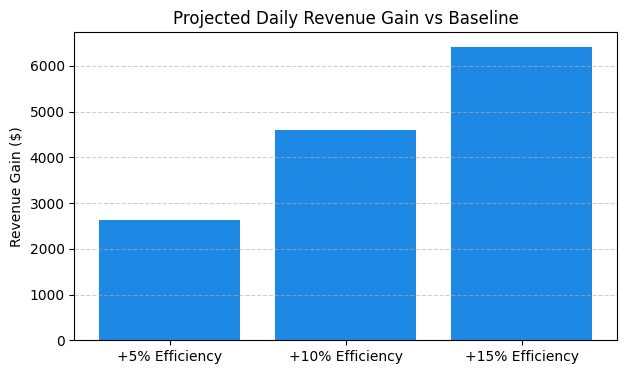

In [6]:
plt.figure(figsize=(7,4))
plt.bar(results_df['Scenario'], results_df['Revenue Gain vs Baseline ($)'], color='#1E88E5')
plt.title('Projected Daily Revenue Gain vs Baseline')
plt.ylabel('Revenue Gain ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

---
### Key Takeaways
- The model demonstrates the **financial impact of small improvements** in operational efficiency.
- Even a 10% improvement across stages can lead to **over $2,000/day** in additional revenue.
- This aligns with the business case from Power BI analysis — improved user flow = measurable revenue gain.